In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import math 

In [2]:
x = np.genfromtxt('trajectory_file')#, dtype= None, delimiter= None)
# print(type(x))

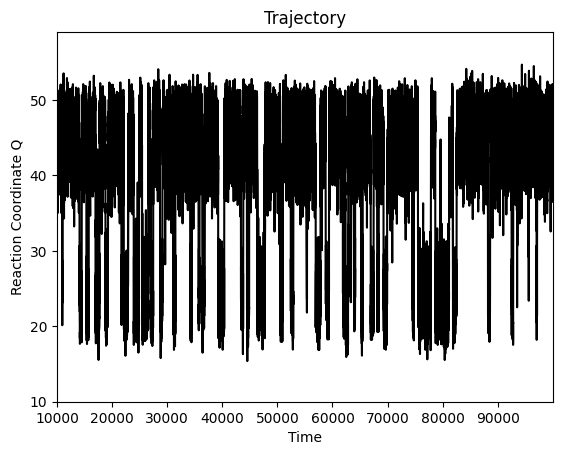

In [3]:
fig, ax = plt.subplots()
ax.plot(x, color= 'black') 
plt.xlabel('Time')
plt.ylabel('Reaction Coordinate Q')
plt.title('Trajectory')
plt.ylim([10, 59])
plt.xlim([10000, 99999])
plt.show()

In [27]:
int_x = []

x0 = 30
x1 = 37
dx = 0.5

for i in x:
    int_x.append(int(i / dx) * dx)
    
hist, bins = np.histogram(int_x, bins= np.arange(min(int_x), max(int_x) + dx, dx))

# print(bins, hist)

def state(x, x0, x1, dx):
    
    ltpx = []
    for i in int_x:
        if x0 > x1:
            x0, x1 = x1, x0  # garante que x0 sempre seja menor que x1   
            
        if x0 <= i <= x1:
            ltpx.append(i)
        
            hist, bins = np.histogram(ltpx, bins= np.arange(min(ltpx), max(ltpx) + dx, dx))
        
    return hist, bins

teste = state(x, x0, x1, dx)

print(teste, bins, hist)

(array([1332, 1147,  914,  861,  763,  745,  667,  734,  787,  960, 1142,
       1336, 1876, 6157]), array([30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. ,
       35.5, 36. , 36.5, 37. ])) [14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.
 21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.
 28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.
 35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5 42.
 42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5 49.
 49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5 56.
 56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5 63.
 63.5 64.  64.5 65. ] [    4    14    48   133   271   679  1396  2362  3835  5815  8302 10485
 12502 14150 15177 15728 15642 15538 14969 14385 14278 14330 14325 13975
 12461 10253  7546  5242  3604  2479  1907  1332  1147   914   861   763
   745   667   734   787   960  1142  1336  1876  2613  3544  

In [1]:
import numpy as np

def compZh(x, dx, dt=1):
    hist, bins = np.histogram(x, bins=np.arange(min(x), max(x) + dx, dx))
    zh = hist / (dt * dx)
    bin_centers = bins[:-1] + dx / 2  # Centro dos bins
    return bin_centers.tolist(), zh.tolist()

def state(x, x0, x1, dx):
    bin_centers, zheq = compZh(x, dx)
    
    zhtp_values = [0] * len(bin_centers)
    
    def addZh(zh_values, ltpx):
        hist, bins = np.histogram(ltpx, bins=np.arange(min(ltpx), max(ltpx) + dx, dx))
        bin_centers_ltpx = bins[:-1] + dx / 2
        for i, bin_val in enumerate(bin_centers):
            if bin_val in bin_centers_ltpx:
                index = list(bin_centers_ltpx).index(bin_val)
                zh_values[i] += hist[index]

    s = 2  # estado inicial
    ltpx = []
    if x0 > x1:
        x0, x1 = x1, x0  # garante que x0 sempre seja menor que x1
    
    for val in x:
        ltpx.append(val)
        
        if s == 2:
            if val <= x0:
                s = 0
            if val >= x1:
                s = 1
        
        if val <= x0:
            if s == 1:
                addZh(zhtp_values, ltpx)
            s = 0
            ltpx = []
        
        if val >= x1:
            if s == 0:
                addZh(zhtp_values, ltpx)
            s = 1
            ltpx = []
    
    ptpx = []
    for i in range(len(bin_centers)):
        if zheq[i] != 0:  # Evita divisão por zero
            prob_cond = zhtp_values[i] / (dx * zheq[i])
            ptpx.append((bin_centers[i], prob_cond))
    
    ptpx.sort()
    return ptpx

# Para testar a função
x = np.genfromtxt('trajectory_file')
x0 = 30
x1 = 37
dx = 0.5  # Defina o intervalo dx adequado para seus dados
result = state(x, x0, x1, dx)
print(result)

[(14.84, 0.0), (15.34, 0.0), (15.84, 0.0), (16.34, 0.0), (16.84, 0.0), (17.34, 0.0), (17.84, 0.0), (18.34, 0.0), (18.84, 0.0), (19.34, 0.0), (19.84, 0.0), (20.34, 0.0), (20.84, 0.0), (21.34, 0.0), (21.84, 0.0), (22.34, 0.0), (22.84, 0.0), (23.34, 0.0), (23.84, 0.0), (24.34, 0.0), (24.84, 0.0), (25.34, 0.0), (25.84, 0.0), (26.34, 0.0), (26.84, 0.0), (27.34, np.float64(0.00010278548668927948)), (27.84, np.float64(0.0)), (28.34, np.float64(0.0004037956793862306)), (28.84, np.float64(0.0003013863773357444)), (29.34, np.float64(0.0008417508417508417)), (29.84, np.float64(0.0011154489682097045)), (30.34, np.float64(0.0023112480739599386)), (30.84, np.float64(0.006481481481481481)), (31.34, np.float64(0.006564551422319475)), (31.84, np.float64(0.005917159763313609)), (32.34, np.float64(0.004005340453938585)), (32.84, np.float64(0.01532033426183844)), (33.34, np.float64(0.0028694404591104736)), (33.84, np.float64(0.004195804195804196)), (34.34, np.float64(0.014563106796116505)), (34.84, np.flo

In [21]:
# bins = np.arange(min(x), max(x) + 0.5, 0.5)

# Q=[]

# for i in x:
#     if 30 <= i <= 37:
#         Q.append(i)
        
# Qbins = np.arange(min(Q), max(Q) + 0.5, 0.5)

# def fistdecimal(bins):
#     return np.trunc(bins * 10) / 10

# q = fistdecimal(bins)

# print(bins, Qbins, q)

In [39]:
import numpy as np

x = np.genfromtxt('trajectory_file')

def dx(x):
    bins = np.arange(min(x), max(x) + 0.5, 0.5)
    dx = np.trunc(bins * 10) / 10
    return dx

hist, bins = np.histogram(x, bins=dx(x), range=None, weights=None) 

def ptpx(x, x0, x1):
    
    ptpx = []
    Q = []
    
    # Garante que x0 seja menor que x1
    if x0 > x1:
        x0, x1 = x1, x0
        
    for i in x:
        if x0 <= i <= x1:
            Q.append(i)
            
    Qbins = np.arange(min(Q), max(Q) + 0.5, 0.5)        
    
    hist, bins = np.histogram(Q, bins=Qbins, range=None, weights=None)
    
    lista = list(zip(bins, hist))
    dct = dict(lista)
            
    return Q

lista = list(zip(bins, hist))
dcx = dict(lista)
dcq = ptpx(x,30,37)

15924 1000000


In [32]:
## Funcion, porém não está como gostaria

def compZh(x, dx, dt=1):
    zh = {}
    for val in x:
        val_int = int(val / dx) * dx # pegamos o valor inteiro da divisão coord x pelo intervalo dx e mult pelo intervalo dx 
        zh[val_int] = zh.get(val_int, 0) + 1
    
    for val in zh:
        zh[val] = float(zh[val]) / dt / dx
    
    return zh

def state(x, x0, x1, dx):
    zheq = compZh(x, dx)
    zhtp = {}
    
    def addZh(zh, ltpx):
        for val in ltpx:
            val_int = int(val / dx) * dx
            zh[val_int] = zh.get(val_int, 0) + 1
    
    s = 2  # estado inicial
    ltpx = []
    if x0 > x1:
        x0, x1 = x1, x0  # garante que x0 sempre seja menor que x1
    
    for val in x:
        ltpx.append(val)
        
        if s == 2:
            if val <= x0:
                s = 0
            if val >= x1:
                s = 1
        
        if val <= x0:
            if s == 1:
                addZh(zhtp, ltpx)
            s = 0
            ltpx = []
        
        if val >= x1:
            if s == 0:
                addZh(zhtp, ltpx)
            s = 1
            ltpx = []
    
    ptpx = []
    for val in zheq:
        ptpx.append((val, float(zhtp.get(val, 0)) / dx / zheq[val]))
        
#     return ptpx
    
    return zhtp, zheq

x = np.genfromtxt('trajectory_file')


# Para testar a função
x0 = 30
x1 = 37
dx = 0.5
result = state(x, x0, x1, dx)
tst = compZh(x, dx, dt=1)
print(result)

# X = []
# Y = []

# for l, i in result.items():
#     X.append(l)
#     Y.append(i)
#     print(X, Y)

({36.5: 333, 36.0: 322, 34.5: 371, 29.5: 127, 31.5: 316, 34.0: 337, 35.5: 312, 38.5: 81, 32.0: 343, 28.5: 81, 32.5: 368, 37.0: 136, 33.0: 327, 30.0: 227, 29.0: 96, 33.5: 352, 35.0: 389, 38.0: 102, 39.0: 59, 31.0: 298, 28.0: 74, 26.5: 46, 37.5: 135, 30.5: 251, 27.5: 53, 27.0: 51, 26.0: 24, 25.5: 11, 39.5: 30, 25.0: 6, 40.0: 21, 40.5: 3, 41.0: 4}, {65.0: 2.0, 52.0: 1964.0, 51.0: 7976.0, 51.5: 4444.0, 49.0: 43070.0, 50.5: 13878.0, 48.5: 53894.0, 48.0: 63650.0, 47.0: 76072.0, 47.5: 70258.0, 46.5: 78082.0, 45.5: 76178.0, 44.5: 72332.0, 43.5: 70142.0, 43.0: 70034.0, 44.0: 71376.0, 42.5: 69714.0, 46.0: 77614.0, 49.5: 31794.0, 45.0: 74392.0, 42.0: 68886.0, 41.0: 60938.0, 41.5: 65082.0, 40.5: 54628.0, 39.5: 36704.0, 40.0: 46566.0, 39.0: 28658.0, 38.5: 20946.0, 38.0: 14786.0, 36.5: 5226.0, 36.0: 3752.0, 34.5: 1920.0, 29.5: 3814.0, 29.0: 4958.0, 26.5: 24922.0, 27.0: 20506.0, 26.0: 27950.0, 25.5: 28650.0, 25.0: 28660.0, 23.0: 31076.0, 23.5: 29938.0, 22.5: 31284.0, 22.0: 31456.0, 21.5: 30354.0, 24.

In [ ]:
# Calcula o p(TP|X)

import numpy as np

x = np.genfromtxt('trajectory_file')

hist, bins = np.histogram(x, bins=100, range=None, weights=None) 


def ptpx(hist, bins, x0, x1, x):
    
    Q = []
    ptpx = []
    x2 = []
    
    for l in x:
        if x0 <= l <= x1:
            Q.append(l)
        
    lista = list(zip(bins, hist))
    dct = dict(lista)
    
    # Garante que x0 seja menor que x1
    if x0 > x1:
        x0, x1 = x1, x0
        
    for x in bins:
        if x0 <= x <= x1:
            x2.append(x)
    
    dx = len(bins)
    
    Qx = len(Q)
    
    for l in bins:
        if l in x2:
            t = (Qx/float(dct.get(l, 0)))*(1/dx)
            ptpx.append((l, t))
        else:
            ptpx.append((l, 0))
            
    return ptpx

# teste da função
x0 = 30
x1 = 37
# dx = 0.5

result = ptpx(hist, bins, x0, x1, x)
# print(result)

# h, b = np.histogram(bins, bins=50, range=None, weights=None) 

# lista = list(zip(bins, hist))
# dct = dict(lista)

# listest = list(zip(b, h))
# dctest = dict(listest)

In [ ]:
x, y = zip(*result) 
fig, ax = plt.subplots()
ax.plot(x, y, color='red', label = 'p(TP|X)')
plt.xlabel('Reaction Coordinate, Q')
plt.ylabel('p(TP|X)')
plt.xlim([None, 60])
plt.ylim([None, None])
plt.legend()
plt.show()

In [ ]:
# import numpy as np

# def ptpx(hist, bins, x0, x1):
#     lista = list(zip(bins, hist))
#     dct = dict(lista)
    
#     ptpx = []
#     x2 = []
    
#     # Garante que x0 seja menor que x1
#     if x0 > x1:
#         x0, x1 = x1, x0
        
#     for x in bins:
#         if x0 <= x <= x1:
#             x2.append(x)
    
#     dx = len(bins)
    
#     for l in bins:
#         if l in x2:
#             t = dx / float(dct.get(l, 0))
#             ptpx.append((l, t))
#         else:
#             ptpx.append((l, 0))
            
#     return ptpx

# x = np.genfromtxt('trajectory_file')

# hist, bins = np.histogram(x, bins=50, range=None, weights=None)

# # teste da função
# x0 = 30
# x1 = 37
# # dx = 0.5

# result = ptpx(hist, bins, x0, x1)
# print(result)

# np.savetxt('TPX.txt', result, fmt='%5.4f')

In [ ]:
# x = np.genfromtxt('trajectory_file')

# hist, bins = np.histogram(x, bins=10000, range=None, weights=None)

# lista = list(zip(bins, hist))
# dct = dict(lista)

# x0 = 30
# x1 = 37
# x2 = []

# for x in bins:
#     if x0 > x1:
#         x0, x1 = x1, x0
#     if x0 <= x <= x1:
#         x2.append(x)
        
# h, b = np.histogram(x2, bins=50, range=None, weights=None)
    
# #     t = dx / float(dct.get(l, 0))
        
# print(h, b)

In [ ]:
# Analysis:
#   D=1 -- computes diffusion coefficient
#   alpha=[dt1,dt2] - list of time steps dt1 and dt2 to build the profiles.
#   ptpx=1 -- computes the probability of being on the transition path.
#     Arguments --x0= , --x1=  and  --dx= should be specified
#     testoptimality=1 -- tests the optimality of the reaction coordinate.
#     Arguments --x0= and --x1= should be specified (x0<x1)

In [ ]:
# calculando histograma
# hist, bins = np.histogram(x, bins=500, range=None, weights=None)  # 'bins' são os números que aparecem e 'hist' é quantidade de vezes que isso ocorre

# print(type(hist))
# print(hist, bins)

# print(bins, hist, len(bins))

# x2 = []

# for i in bins:
#     if 30 <= i <= 37:
#         x2.append(i)
        
# h, b = np.histogram(x2, bins=50, range=None, weights=None)
        
# print(x2, bins, b)

In [ ]:
# import numpy as np
# import matplotlib.pyplot  as plt
# import math 

# test = np.genfromtxt('trajectory_file')

# j0 = 30
# j1 = 37
# j2 = []

# n2 = []

# h, b = np.histogram(test, bins=100, range=None, weights=None)

# dx = len(b)

# listest = list(zip(b, h))
# dctest = dict(listest)

# for n in b:
#     if j0 <= n <= j1:
#         j2.append(n)
        
#     for j in test:
#         if j0 <= j <= n:
#             j2.append(j)

# print(j2)

# for n in range(dx):
#     print(n)

# print(h, b, dctest)

In [ ]:
# Calcula o p(TP|X)


# def ptpx(hist, bins, x0, x1):
    
#     lista = list(zip(bins, hist))
#     dct = dict(lista)
    
#     ptpx = []
#     x2 = []
    
#     # Garante que x0 seja menor que x1
#     if x0 > x1:
#         x0, x1 = x1, x0
        
#     for x in bins:
#         if x0 <= x <= x1:
#             x2.append(x)
    
#     dx = len(bins)
    
#     for l in bins:
#         if l in x2:
#             t =  dx / float(dct.get(l, 0))
#             ptpx.append((l, t))
#         else:
#             ptpx.append((l, 0))
            
#     return ptpx 

# x = np.genfromtxt('trajectory_file')
                    
# hist, bins = np.histogram(x, bins=10, range=None, weights=None)                   

# # teste da função
# x0 = 30
# x1 = 37
# # dx = 0.5

# result = ptpx(hist, bins, x0, x1)
# print(result)

# np.savetxt('TPX.txt', result, fmt='%5.4f')

Ao que parece zheq calcula o hist sem condições, em seguida zhtp recebe um novo hist com as condições impostas

A função Compilação ZH calcula uma distribuição de probabilidade condicional. Ela recebe uma lista x, um valor dx e um valor de tempo dt (com um valor padrão de 1). Essa função itera sobre os valores em x, arredondando cada valor para o menor múltiplo de dx e então contabiliza a frequência desses valores em um dicionário zh. Posteriormente, divide esses valores pela quantidade total de tempo e pelo tamanho do intervalo dx para obter a distribuição de probabilidade. (A probabilidade de equilíbrio da coordenada de reação)

Já a função compptpx parece estar calculando o p(TP∣x). Ela recebe uma lista lx, um valor dx, dois valores de corte x0 e x1. A função organiza a lista lx em intervalos definidos por x0 e x1, contabiliza a frequência dos valores nesses intervalos e, em seguida, calcula a probabilidade condicional p(TP∣x) para cada intervalo. (A probabilidade de estar em um caminho de transição dado o valor de x)

In [ ]:
# lista = list(zip(bins, hist))
# dicti = dict(lista)

# print(type(dicti), dicti)

In [ ]:
# def test(hist, bins, x0, x1, dx):
#     ptpx = []
    
#     # Garante que x0 seja menor que x1
#     if x0 > x1:
#         x0, x1 = x1, x0
    
#     # Calcula o número total de eventos
#     total_events = np.sum(hist)
    
#     # Loop sobre os bins e valores de probabilidade
#     for bin_center, prob in zip(bins, hist):
#         if x0 <= bin_center <= x1:
#             # Calcula a densidade de probabilidade para cada bin
#             density = total_events/ dx /prob
#             ptpx.append((bin_center, density))
    
#     return ptpx

# # Carrega os dados do arquivo 'trajectory_file'
# x = np.genfromtxt('trajectory_file')

# # Calcula o histograma
# hist, bins = np.histogram(x, bins=100, range=None, weights=None) 

# # Define os parâmetros
# x0 = 30
# x1 = 37
# dx = 0.5

# # Chama a função test
# result = test(hist, bins, x0, x1, dx)
# print(result)

In [ ]:
# def test(hist, bins, x0, x1, dx):
#     ptpx = []
    
#     # Garante que x0 seja menor que x1
#     if x0 > x1:
#         x0, x1 = x1, x0
        
#     for x in bins:
#         if x0 <= x <= x1:
#             h, b = np.histogram(x, bins=500, range=None, weights=None)
    
#     return h

# # Carrega os dados do arquivo 'trajectory_file'
# x = np.genfromtxt('trajectory_file')

# # Calcula o histograma
# hist, bins = np.histogram(x, bins=100, range=None, weights=None) 

# # Define os parâmetros
# x0 = 30
# x1 = 37
# dx = 0.5

# # Chama a função test
# result = test(hist, bins, x0, x1, dx)
# print(result)

In [ ]:
# def test(lista, hist, bins, x0, x1, dx):
#     ptpx = []
#     h = []
    
#     # Garante que x0 seja menor que x1
#     if x0 > x1:
#         x0, x1 = x1, x0
        
#     # Itera sobre os bins fornecidos
#     for i in range(len(bins)):
#         if x0 <= bins[i] <= x1:
#             h.append(hist[i]) # Adiciona o valor do histograma dentro do intervalo ao resultado
    
#     return ptpx

# # Carrega os dados do arquivo 'trajectory_file'
# x = np.genfromtxt('trajectory_file')

# # Calcula o histograma
# hist, bins = np.histogram(x, bins=100, range=None, weights=None) 

# # Define os parâmetros
# x0 = 30
# x1 = 37
# dx = 0.5
# lista = list(zip(bins, hist))
# dicti = dict(lista)

# # Chama a função test
# result = test(dicti, hist, bins, x0, x1, dx)
# print(result)

In [ ]:
# def test(hist, bins, x0, x1, dx):
#     ptpx = []
#     h = []
    
#     # Garante que x0 seja menor que x1
#     if x0 > x1:
#         x0, x1 = x1, x0
        
#     # Itera sobre os bins fornecidos
#     for i in range(len(bins)):
#         if x0 <= bins[i] <= x1:
#             h.append(hist[i]) # Adiciona o valor do histograma dentro do intervalo ao resultado
    
#     # Calcula a densidade de probabilidade para cada valor dentro do intervalo
#     for bin_val, hist_val in zip(bins, hist):
#         if x0 <= bin_val <= x1:
#             density = hist_val / dx / np.sum(h)
#             ptpx.append((bin_val, density))
    
#     ptpx.sort()
    
#     return ptpx

# # Carrega os dados do arquivo 'trajectory_file'
# x = np.genfromtxt('trajectory_file')

# # Calcula o histograma
# hist, bins = np.histogram(x, bins=100, range=None, weights=None) 

# # Define os parâmetros
# x0 = 30
# x1 = 37
# dx = 0.5

# # Chama a função test
# result = test(hist, bins, x0, x1, dx)
# print(result)

In [ ]:
# def ptpx(hist, bins, x0, x1, dx):
    
#     lista = list(zip(bins, hist))
#     dct = dict(lista)
    
#     ptpx = []
#     h = []
#     b = []
    
#     # Garante que x0 seja menor que x1
#     if x0 > x1:
#         x0, x1 = x1, x0
    
#     # calcula o ptpx
#     for i in range(len(bins)):
#         if x0 <= bins[i] <= x1:
#             b.append(bins[0+i])
#             h.append(hist[0+i])
            
#     novo = list(zip(b, h))
#     bh = dict(novo)
            
#     for i in dct:
#         ptpx.append((i, float(bh.get(i, 0)) / dx / dct[i]))
#     ptpx.sort()
    
#     return ptpx

# x = np.genfromtxt('trajectory_file')

# hist, bins = np.histogram(x, bins=1000, range=None, weights=None) 

# # teste da função
# x0 = 30
# x1 = 37
# dx = 0.5

# result = ptpx(hist, bins, x0, x1, dx)
# print(result)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
data = np.random.randn(1000)  # 1000 pontos de dados da distribuição normal

# Calcular o histograma com densidade
hist, bin_edges = np.histogram(data, bins=30, density=True)

# Plotar o histograma
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plotar a função de densidade de probabilidade
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histograma Normalizado com Density=True")
plt.show()